<a href="https://colab.research.google.com/github/avadhani123/Practical-Machine-Learning/blob/master/Assignment2_Experiments1%2C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Objective
This study is a comparative exploration of dense neural networks and convolutional neural networks (CNNs) for image classification, with a two-fold goal: develop a neural network model for highly-accurate and generalizable classification and gain an in-depth understanding of how various factors affect fitting and ultimate test set performance with networks of differing topologies and hyperparameter settings.

These experiments will help determine different deep learning models' potential utility in classification problems for computer vision on the Fashion MNSIT dataset of image recognition problems, for example facial recognition.



Import Statements

In [ ]:
import numpy as np
import pandas as pd
import os
from collections import Counter
import datetime

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# Check Keras version
keras.__version__

'2.4.0'

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
#import Fashion MNSIT data set

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images.shape, test_images.shape, test_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (10000,), (10000,))

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

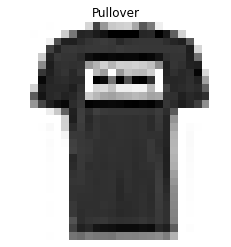

In [ ]:
plt.imshow(train_images[1], cmap="binary") 
plt.axis('off')
plt.title(class_names[test_labels[1]], fontsize=12)
plt.show()

In [ ]:
#data pre processing

In [ ]:
train_images = train_images.astype('float32') / 255

test_images = test_images.astype('float32') / 255

In [ ]:
val_images, train_images = train_images[:5000], train_images[5000:] 
val_labels, train_labels = train_labels[:5000], train_labels[5000:]

EXPERIMENT 1:
The baseline DNN model will consist of 784 input nodes, a hidden layer with 5 nodes and 10 output nodes (corresponding to the 10 fashion categories).

The following four (fifth will be a repeat of all with regularization) experiments use 20 epochs of batch size 100 and no regularization


In [ ]:
#Building the model

In [ ]:
model_1 = models.Sequential()
model_1.add(layers.Flatten(input_shape=[28, 28]))
model_1.add(layers.Dense(5, activation='relu'))
model_1.add(layers.Dense(10, activation='softmax'))

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 3925      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                60        
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compiling the model

In [ ]:
model_1.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
#training the model

In [ ]:
train_rt = TrainRuntimeCallback()
history = model_1.fit(train_images, train_labels, callbacks=[train_rt], epochs=20, batch_size=100,
                    validation_data=(val_images, val_labels))

# Saving models locally after fitting
save_dir = "results/"
model_name = 'fashion_mnist_model_1.h5'
model_path = os.path.join(save_dir, model_name)
model_1.save(model_path)

Epoch 1/20
550/550 [==============================] - 1s 2ms/step - loss: 1.8298 - accuracy: 0.3590 - val_loss: 1.0563 - val_accuracy: 0.7034
Epoch 2/20
550/550 [==============================] - 1s 2ms/step - loss: 0.9494 - accuracy: 0.7194 - val_loss: 0.6535 - val_accuracy: 0.7846
Epoch 3/20
550/550 [==============================] - 1s 2ms/step - loss: 0.6413 - accuracy: 0.7875 - val_loss: 0.5835 - val_accuracy: 0.8096
Epoch 4/20
550/550 [==============================] - 1s 2ms/step - loss: 0.5724 - accuracy: 0.8090 - val_loss: 0.5502 - val_accuracy: 0.8138
Epoch 5/20
550/550 [==============================] - 1s 2ms/step - loss: 0.5533 - accuracy: 0.8121 - val_loss: 0.5279 - val_accuracy: 0.8230
Epoch 6/20
550/550 [==============================] - 1s 2ms/step - loss: 0.5293 - accuracy: 0.8175 - val_loss: 0.5145 - val_accuracy: 0.8288
Epoch 7/20
550/550 [==============================] - 1s 2ms/step - loss: 0.5154 - accuracy: 0.8255 - val_loss: 0.5108 - val_accuracy: 0.8294
Epoch 

In [ ]:
#setting up run time for the  model

In [ ]:
class TrainRuntimeCallback(keras.callbacks.Callback):

  def on_train_begin(self,logs={}):
    self.start = datetime.datetime.now()

  def on_train_end(self,logs={}):
    self.process_time = (datetime.datetime.now() - self.start).total_seconds()

In [ ]:
class TestRuntimeCallback(keras.callbacks.Callback):

  def on_test_begin(self,logs={}):
    self.start = datetime.datetime.now()

  def on_test_end(self,logs={}):
    self.process_time = (datetime.datetime.now() - self.start).total_seconds()

In [ ]:
train_time = train_rt.process_time
train_time 

20.172836

In [ ]:
#adding weights

In [ ]:
model_1.layers[1].weights

[<tf.Variable 'dense/kernel:0' shape=(784, 5) dtype=float32, numpy=
 array([[-0.0849561 , -0.02450576,  0.5867725 , -0.1840325 , -0.30403835],
        [-0.13381866,  0.01560653,  0.09165822, -0.07803594,  0.00608644],
        [ 0.39040878, -0.40665144, -0.47576365, -0.4887883 , -0.10543999],
        ...,
        [ 0.474435  ,  0.41354388,  0.10598858, -0.03145833,  0.23590465],
        [ 0.00998949,  0.60049903, -0.11730639, -0.19239679,  0.39222434],
        [ 0.07809   ,  0.43139693,  0.2116204 , -0.48969594,  0.10832094]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(5,) dtype=float32, numpy=
 array([ 1.0045769 ,  0.8961467 ,  0.6753065 ,  0.9230633 , -0.32683718],
       dtype=float32)>]

In [ ]:
test_rt = TestRuntimeCallback()
test_loss, test_acc = model_1.evaluate(test_images, test_labels, callbacks=[test_rt])
test_time = test_rt.process_time
test_time # in seconds

313/313 [==============================] - 1s 1ms/step - loss: 0.5112 - accuracy: 0.8244


0.52962

In [ ]:
#creating a results table and testing accuracy by plotting the model

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail()

,loss,accuracy,val_loss,val_accuracy
15,0.472350,0.834200,0.484858,0.8346
16,0.469477,0.835364,0.490041,0.8330
17,0.467037,0.837309,0.485983,0.8356
18,0.466209,0.837127,0.487460,0.8384
19,0.463785,0.837818,0.485111,0.8342


In [ ]:
results_df = history_df.iloc[-1:].copy()
results_df.insert(0,'model','DNN (2 layers no regularization)') 
results_df['training time (sec)'] = train_time     
results_df['testing time (sec)'] = test_time     

In [ ]:
results_df

,model,loss,accuracy,val_loss,val_accuracy,training time (sec),testing time (sec)
19,DNN (2 layers),0.463785,0.837818,0.485111,0.8342,20.172836,0.52962


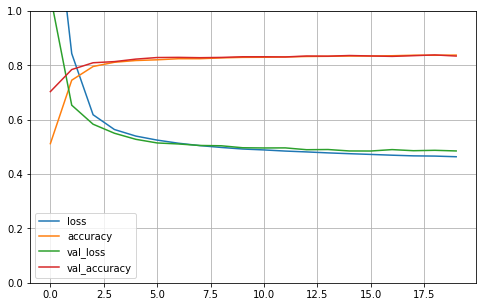

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]

plt.show()

**Experiment 2:  784 input nodes, a hidden layer with 10 nodes, another hidden layer with 5 nodes and 10 output nodes corresponding to the 10 categories in the dataset.**

In [ ]:
#building the model

In [ ]:
model_2 = models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(5, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                60        
Total params: 7,965
Trainable params: 7,965
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compiling the model

In [ ]:
model_2.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
train_rt = TrainRuntimeCallback()
history = model_2.fit(train_images, train_labels, callbacks=[train_rt], epochs=20, batch_size = 100,
                    validation_data=(val_images, val_labels))

# Saving models locally after fitting
save_dir = "results/"
model_name = 'fashion_mnist_model_2.h5'
model_path = os.path.join(save_dir, model_name)
model_2.save(model_path)
print('Saved trained model at %s ' % model_path)

Epoch 1/20
550/550 [==============================] - 2s 2ms/step - loss: 1.5204 - accuracy: 0.4524 - val_loss: 0.6242 - val_accuracy: 0.7888
Epoch 2/20
550/550 [==============================] - 1s 2ms/step - loss: 0.6150 - accuracy: 0.7897 - val_loss: 0.5157 - val_accuracy: 0.8228
Epoch 3/20
550/550 [==============================] - 1s 2ms/step - loss: 0.5263 - accuracy: 0.8196 - val_loss: 0.4998 - val_accuracy: 0.8288
Epoch 4/20
550/550 [==============================] - 1s 2ms/step - loss: 0.4980 - accuracy: 0.8280 - val_loss: 0.4669 - val_accuracy: 0.8388
Epoch 5/20
550/550 [==============================] - 1s 2ms/step - loss: 0.4786 - accuracy: 0.8336 - val_loss: 0.4499 - val_accuracy: 0.8436
Epoch 6/20
550/550 [==============================] - 1s 2ms/step - loss: 0.4540 - accuracy: 0.8433 - val_loss: 0.4362 - val_accuracy: 0.8518
Epoch 7/20
550/550 [==============================] - 1s 2ms/step - loss: 0.4406 - accuracy: 0.8478 - val_loss: 0.4277 - val_accuracy: 0.8554
Epoch 

In [ ]:
#getting the runtime of testing

In [ ]:
test_rt = TestRuntimeCallback()
test_loss, test_acc = model_2.evaluate(test_images, test_labels, callbacks=[test_rt])
test_time = test_rt.process_time
test_time 

313/313 [==============================] - 1s 1ms/step - loss: 0.4413 - accuracy: 0.8459


0.525655

In [ ]:
#seeing results and storing them in dataframe then plotting the accuracy and loss

In [ ]:
history_dict = history.history
history_dict.keys()
history_df=pd.DataFrame(history_dict)
history_df.tail()

,loss,accuracy,val_loss,val_accuracy
15,0.395330,0.863236,0.421674,0.8588
16,0.392718,0.862345,0.403674,0.8634
17,0.389529,0.864600,0.399852,0.8660
18,0.388750,0.864691,0.410033,0.8624
19,0.386725,0.864255,0.399334,0.8646


In [ ]:
history_dict = history.history
history_df=pd.DataFrame(history_dict)
results_df2 = history_df.iloc[-1:].copy()
results_df2.insert(0,'model','DNN (3 layers)') 
results_df2['training time (sec)'] = train_time      
results_df2['testing time (sec)'] = test_time      
results_df2

,model,loss,accuracy,val_loss,val_accuracy,training time (sec),testing time (sec)
19,DNN (3 layers),0.386725,0.864255,0.399334,0.8646,20.172836,0.525655


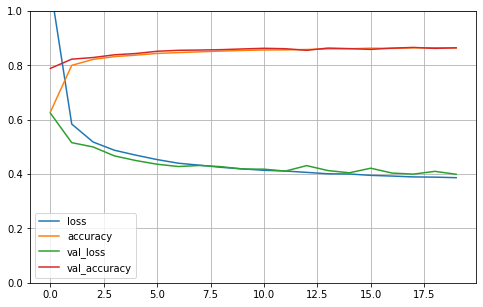

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Experiment 3:

We create a CNN with 2 convolution/max pooling layers (no drop out) to work with our Fashion MNIST dataset. All layers will use the ReLU activation function. We are going to build a CNN with 2 convolutional/max pooling layers. The last layer is a 10-way "softmax" layer, which means it will return an array of 10 probability scores (summing to 1). E

In [ ]:
#reshaping data

In [114]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images.shape, test_images.shape, test_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (10000,), (10000,))

In [117]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [118]:
val_images, train_images = train_images[:5000], train_images[5000:] 
val_labels, train_labels = train_labels[:5000], train_labels[5000:]

In [ ]:
#build the model network

In [119]:
model_3a = models.Sequential()
model_3a.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_3a.add(layers.MaxPooling2D((2, 2)))
model_3a.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3a.add(layers.MaxPooling2D((2, 2)))
model_3a.add(layers.Flatten())
model_3a.add(layers.Dense(128, activation='relu'))
model_3a.add(layers.Dense(10, activation='softmax'))

In [120]:
model_3a.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_6 (Dense)              (None, 10)               